# TF-IDF Analysis

TF-IDF (term frequency-inverse document frequency) analysis is a statistical technique used in natural language processing and information retrieval to determine the importance of a word in a document or corpus. It is a way to measure how relevant a word is to a document in a collection of documents.

TF-IDF analysis assigns a weight to each word in a document based on how frequently it appears in the document (term frequency) and how rare it is in the entire corpus (inverse document frequency). The weight assigned to a word increases proportionally with its frequency in the document, but is offset by the rarity of the word in the corpus. This means that words that appear frequently in a document but also appear frequently in many other documents in the corpus are given a lower weight, while words that appear less frequently in the corpus but frequently in a particular document are given a higher weight.

The output of TF-IDF analysis is a numerical representation of each document that captures the importance of each word in that document. This can be used for various tasks such as text classification, clustering, and information retrieval.

## Table of Contents
* [Connect to Database ](#Connect-to-database)
* [Import Datasets](#Import-Dataset)
* [Remove Stopwords](#Remove-stopwords)
* [Lemmatization](#Lemmatization)

## Connect to Database

In [1]:
import mysql.connector
import pandas as pd

#creds = ["username","password","juliehaegh","ninG20&19rea","3306"] 
creds = ["juliehaegh","ninG20&19rea","172.20.20.4","hgo",3306]

In [2]:
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
311


## Import Datasets

In [3]:
# Import Alert P1 dataset
SClinic = pd.read_sql("""SELECT * FROM ConsultaUrgencia_doentespedidosconsultaNeurologia2012""",mydb)

# Import SClinic
AlertP1 = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)

# Replace all NaN with 0
AlertP1 = AlertP1.fillna(0)

# Add result column
AlertP1['result'] = ['Accepted' if x in [0,14,25,20,53,8,12,12] else 'Refused' for x in AlertP1['COD_MOTIVO_RECUSA']]

/Users/juliehaegh/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/juliehaegh/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# Create a new column with accepted and rejected cases
#SClinic['Accepted/Rejected'] = SClinic['COD_MOTIVO_RECUSA'].apply(lambda x: 'Accepted' if x == 0 else 'Rejected')
#SClinic = SClinic[(SClinic['Texto']!='') & (SClinic['Accepted/Rejected']=='Accepted')].iloc[887:987]
#SClinic = SClinic[SClinic['Texto']!='']
#SClinic

In [5]:
import math

# Split data into train and test
AlertP1_sorted = AlertP1[AlertP1['Texto']!=''].sort_values(by='DATA_RECEPCAO')

# calculate the index for the split
split_index = math.ceil(0.8 * len(AlertP1_sorted))

# split the data frame into test and train sets
train_set = AlertP1_sorted.iloc[:split_index]
test_set = AlertP1_sorted.iloc[split_index:]

In [11]:
# Import librariers 
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remove Stopwords

In [12]:
# Get rid of special characters and transform Texto column to Latin words
train_set['Texto'] = train_set['Texto'].apply(lambda x: unidecode(x))

#The re.sub function is used to substitute all digits (\d) with an empty string
train_set['Texto'] = train_set['Texto'].apply(lambda x: re.sub(r'\d', '', x))

# Remove all names in Texto variable
# This function uses a regular expression to find all words in the text that start with a 
# capital letter (\b[A-Z][a-z]+\b), which are assumed to be names
text = train_set['Texto'] 

# remove all hyphens from the text
text = text.replace('-', '')

def remove_names(text):
    # Find all words that start with a capital letter
    names = re.findall(r'\b[A-Z][a-z]+\b', text)
    
    # Replace the names with an empty string
    for name in names:
        text = text.replace(name, '')
        
    return text

In [13]:
# Create an empty list to store the text
text_list = []

# Loop through the 'text' column
for text in text.str.lower(): # Transform every word to lower case
    text_list.append(text)

# Print the list of text
#print(text_list)

In [14]:
# Download the Portuguese stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the Portuguese stop words
stop_words = set(stopwords.words('portuguese'))

# Manually remove stopwords
stop_words.update(['-//','.', ',','(',')',':','-','?','+','/',';','2','1','drª','``','','3','desde','anos','doente','consulta','alterações','se',"''",'cerca','refere','hgo','utente','vossa','s','...','ainda','c','filha','costa','dr.','pereira','ja','--','p','dr','h','n','>','q','//','..','b','++','%','//','-','+++/','=','+++/'])

# Create a new list to store the filtered text
filtered_text = []

# Loop through the text_list and remove the stop words
for text in text_list:
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    filtered_text.append(" ".join(words))

# Print the filtered text
#print(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliehaegh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# Save the filtered text as a new column to the dataframe
train_set['filtered_text'] = filtered_text

## Lemmatization

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning

In [16]:
# Define function for lemmatization
def spacy_lemmatizer(df):
    import spacy
    import pt_core_news_md
    nlp = pt_core_news_md.load()

    doclist = list(nlp.pipe(df))

    docs=[]
    for i, doc in enumerate(doclist):
        docs.append(' '.join([listitem.lemma_ for listitem in doc]))
        
    return docs

In [17]:
# create an empty list to store the words
word_list = []

# loop through each row of the "text_column" column
for index, row in train_set.iterrows():
    
    # split the text into individual words using whitespace as a delimiter
    words = row['filtered_text'].split()
    # add the words to the word list
    word_list.extend(words)

# print the word list
print(word_list)

['dor', 'lapso', 'foi-lhe', 'dada', 'alta', 'qualquer', 'justificacao', 'polipatologia', 'neuro-pulmonar', 'sequelas', 'acidente', 'tromboembolismo', 'acompanhado', 'dra', 'rodrigues', 'rodrigues', 'avaliado', 'regularmente', 'c.', 'pneumo+', 'med', 'interna', 'anticoagulado', 'polifarmacia', 'terapia', 'controle', 'dor', 'neuropatica', 'relatorio', 'clinico', 'homem', 'ap', 'dm', 'gamapatia', 'monoclonal', 'igm', 'dca', 'arterial', 'periferica', 'grave', 'mis', 'doenca', 'paget', 'perda', 'forca', 'muscular', 'parestesias', 'mis', 'agravamento', 'queixas', 'ultimos', 'meses', 'dificuldade', 'marcha', 'emg', 'pnp', 'mista', 'axonal', 'desmielinizante', 'mis', 'ms', 'desmileinizacao', 'secundaria', 'mulher', 'dor', 'ponta', 'lingua', 'sensacao', 'repuxamento', 'lingua', 'agrafada', 'perda', 'sensibilidade', 'paladar', 'apos', 'remocao', 'fibroma', 'complicada', 'infeccao', 'referencia-se', 'neurologia', 'observacao', 'orientacao', 'terapeutica', 'epilepsia', 'sintomatologia', 'mulher', 

In [18]:
# create an empty list to store the words
word_list = []

# loop through each row of the "text_column" column
for index, row in train_set.iterrows():
    
    # split the text into individual words using whitespace as a delimiter
    words = row['filtered_text'].split()
    
    # remove hyphens from the words and add them to the word list
    word_list.extend([word.replace('-', '') for word in words])
    # remove slash from the words and ass them to the list
    word_list.extend([word.replace('/', '') for word in words])
    

# print the cleaned word list
print(word_list)

['dor', 'lapso', 'foilhe', 'dada', 'alta', 'qualquer', 'justificacao', 'polipatologia', 'neuropulmonar', 'sequelas', 'acidente', 'tromboembolismo', 'acompanhado', 'dra', 'rodrigues', 'rodrigues', 'avaliado', 'regularmente', 'c.', 'pneumo+', 'med', 'interna', 'anticoagulado', 'polifarmacia', 'terapia', 'controle', 'dor', 'neuropatica', 'dor', 'lapso', 'foi-lhe', 'dada', 'alta', 'qualquer', 'justificacao', 'polipatologia', 'neuro-pulmonar', 'sequelas', 'acidente', 'tromboembolismo', 'acompanhado', 'dra', 'rodrigues', 'rodrigues', 'avaliado', 'regularmente', 'c.', 'pneumo+', 'med', 'interna', 'anticoagulado', 'polifarmacia', 'terapia', 'controle', 'dor', 'neuropatica', 'relatorio', 'clinico', 'relatorio', 'clinico', 'homem', 'ap', 'dm', 'gamapatia', 'monoclonal', 'igm', 'dca', 'arterial', 'periferica', 'grave', 'mis', 'doenca', 'paget', 'perda', 'forca', 'muscular', 'parestesias', 'mis', 'agravamento', 'queixas', 'ultimos', 'meses', 'dificuldade', 'marcha', 'emg', 'pnp', 'mista', 'axonal'

In [19]:
Lemma = spacy_lemmatizer(word_list) # Call lemmatizer function

# print length of word_list and compare the count after doing lemmatization
from collections import Counter

items = Counter(Lemma).keys()
print('The number of words after lemmatization:',len(items))

items2 = Counter(word_list).keys()
print('The number of words before lemmatization:',len(items2))

The number of words after lemmatization: 8793
The number of words before lemmatization: 10712


In [20]:
# apply the spacy_lemmatizer function to each row in the 'text' column
train_set['text_lemmatized'] = spacy_lemmatizer(train_set['filtered_text'])

# drop rows with empty strings
train_set_filtered = train_set[['text_lemmatized','filtered_text']].replace('', pd.NA).dropna()
train_set_filtered = pd.DataFrame(train_set_filtered)
train_set_filtered

,text_lemmatized,filtered_text
1540,dor lapso efoi-le dar alto qualquer justificac...,dor lapso foi-lhe dada alta qualquer justifica...
525,relatorio clinico,relatorio clinico
121,homem ap dm gamapatia monoclonal igm dca arter...,homem ap dm gamapatia monoclonal igm dca arter...
168,mulher dor ponto lingua sensacao repuxamento l...,mulher dor ponta lingua sensacao repuxamento l...
1154,epilepsia,epilepsia
...,...,...
1619,justificacao optimizacao diagnosticar terapeut...,justificacao optimizacao diagnostica terapeuti...
902,referencia duplicar,referencia duplicada
901,referencia duplicar,referencia duplicada
1105,historia actual problema saude resolver parkin...,historia actual problema saude resolver parkin...


## Calculate distance between words using 'Jarowynkler'

In natural language processing and text mining, the distance between words refers to the measure of how dissimilar or different two words are in terms of their spelling, meaning, or context. It is used to compare two words or to quantify the similarity between them.

These distance metrics are useful in many natural language processing tasks, such as spell checking, text classification, clustering, and information retrieval, among others. They enable us to quantify the similarity or dissimilarity between words or texts and to make data-driven decisions based on this information.

In the code below, we will just measure the distance between medication words.

In [21]:
# Import medication list
drug_name = pd.read_excel('/Users/juliehaegh/Downloads/drugs_data.xlsx')

# Convert string to list
drug_list = drug_name.drug_name.values.tolist()

In [22]:
import Levenshtein

# create an empty list to store the distances
distances = []

# loop through each pair of adjacent words in the word list
for i in range(len(word_list)-1):
    
    # calculate the Levenshtein distance between the current word and the next word
    distance = Levenshtein.distance(word_list[i], word_list[i+1])
    
    # add the distance to the list of distances
    distances.append(distance)

# print the list of distances
#print(len(distances))
#print(distances)

In [23]:
import Levenshtein

# create an empty list to store the distances
distances = []

# loop through each pair of adjacent words in the word list
for i in range(len(word_list)-1):
    
    # calculate the Levenshtein distance between the current word and the next word
    distance = Levenshtein.distance(word_list[i], word_list[i+1])
    
    # add the distance to the list of distances
    distances.append(distance)

# merge adjacent words with a distance lower than 1
merged_word_list = []
i = 0
while i < len(word_list):
    if i == len(word_list) - 1:
        # last word in the list, add it to the merged word list
        merged_word_list.append(word_list[i])
        i += 1
    elif distances[i] < 1:
        # merge the current and next word into a single word and add it to the merged word list
        merged_word_list.append(word_list[i] + word_list[i+1])
        i += 2
    else:
        # add the current word to the merged word list
        merged_word_list.append(word_list[i])
        i += 1

# print the merged word list
#print(merged_word_list)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create a CountVectorizer object
count_vectorizer = CountVectorizer()

# fit and transform the text data
count_matrix = count_vectorizer.fit_transform(train_set_filtered['text_lemmatized'])

# create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(train_set_filtered['text_lemmatized'])

# print the document-term matrix for CountVectorizer
#print("Count Vectorizer:\n")
#print(pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out()))

# print the document-term matrix for TfidfVectorizer
#print("\nTF-IDF Vectorizer:\n")
#print(pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))

In [25]:
# create a CountVectorizer object
count_vectorizer = CountVectorizer()

# fit and transform the text data
#count_matrix = count_vectorizer.fit_transform(train_set_filtered['text_lemmatized'])
count_matrix = count_vectorizer.fit_transform(train_set['text_lemmatized'])

# create a dataframe for CountVectorizer output
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
#tfidf_matrix = tfidf_vectorizer.fit_transform(train_set_filtered['text_lemmatized'])
tfidf_matrix = tfidf_vectorizer.fit_transform(train_set['text_lemmatized'])

# create a dataframe for TfidfVectorizer output
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# print the document-term matrix for CountVectorizer
print("Count Vectorizer:\n")
count_df

# print the document-term matrix for TfidfVectorizer
print("\nTF-IDF Vectorizer:\n")
tfidf_df
tfidf_df.to_csv('tf-idf.csv')

Count Vectorizer:


TF-IDF Vectorizer:



In [26]:
tf_idf = tfidf_df.max().sort_values(ascending=False).head(100)
#tf_idf.to_csv('tf-idf.csv')
#mean_scores = tfidf_df.mean()
#mean_scores.sort_values(ascending=False).head(20)

In [27]:
# Load tf-idf scores
tfidf_data = pd.read_csv('tf-idf.csv')
tfidf_data

,Unnamed: 0,2e,aa,aacentuar,aas,aat,ab,abaixo,abandonar,abandono,...,zonegr,zonegram,zonegran,zonisamer,zoster,zotepino,zumbido,zyloric,zyprexa,zyprexo
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1415,1415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,1416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1417,1417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Replace all NaN with 0
tfidf_data = tfidf_data.fillna(0)
#tfidf_data

Next, concatenate the SClinic dataset with the tfidf_data dataframe using the concat() function from the pandas library.

In [29]:
AlertP1_tfidf = pd.concat([train_set, tfidf_data], axis=1)

# Check for NaN values in a DataFrame called my_data
print(AlertP1_tfidf.isnull().sum())

# Remove NaN values from my_data
AlertP1_tfidf.dropna(inplace=True)

# Replace NaN values with 0 in my_data
AlertP1_tfidf.fillna(0, inplace=True)

ID_DOENTE              296
PROCESSO               296
COD_REFERENCIA         296
COD_PZ                 296
COD_UNID_SAUDE_PROV    296
                      ... 
zotepino               296
zumbido                296
zyloric                296
zyprexa                296
zyprexo                296
Length: 8222, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def log_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    coefficients = log_reg.coef_
    intercept = log_reg.intercept_
    return y_pred, coefficients, intercept, X_train, X_test, y_train, y_test

In [31]:
from sklearn.linear_model import LogisticRegression

eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','text_lemmatized','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','filtered_text','Texto','PROVENIENCIA']
X = AlertP1_tfidf.drop(eliminate_cols,axis=1)# Features
y = AlertP1_tfidf['result']

# Instantiate the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the encoder on the target variable and transform it
y = le.fit_transform(y)
features=X.columns

log_reg = LogisticRegression()
log_reg.fit(X, y)

#log_regression is defined in functions
y_pred,coefficients,intercept,X_train, X_test, y_train, y_test=log_regression(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df.sort_values(by= 'coefficients',ascending=False).head(20)

,Feature,coefficients
5810,parkinson,0.935249
6092,polineuropatia,0.921760
3235,falecer,0.844074
3926,historia,0.753930
6731,remarcacao,0.747490
4886,medicacao,0.692385
6652,referencia,0.651676
4933,memoria,0.634805
1993,dca,0.631306
1935,cronico,0.625498


Accuracy: 0.6533333333333333
Recall: 0.038461538461538464
Precision: 0.5
              precision    recall  f1-score   support

     refused       0.66      0.98      0.79       147
    accepted       0.50      0.04      0.07        78

    accuracy                           0.65       225
   macro avg       0.58      0.51      0.43       225
weighted avg       0.60      0.65      0.54       225



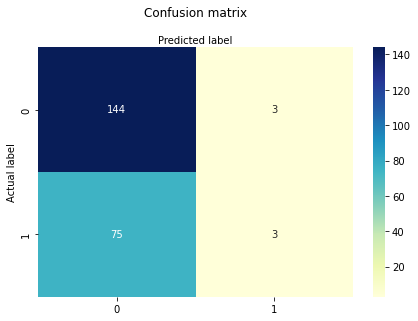

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

# 